In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
import numpy as np

In [29]:
data_2014_2016 = pd.read_csv('./datasets/2014_2016_simple.csv')
data_2017 = pd.read_csv('./datasets/2017_simple.csv')
data_2018 = pd.read_csv('./datasets/2018_simple.csv')
data_2019 = pd.read_csv('./datasets/2019_simple.csv')
holidays = pd.read_csv('./datasets/holidays.csv')

In [30]:
data = pd.DataFrame()
all_data = pd.concat([data_2014_2016, data_2017, data_2018, data_2019.head(30)], ignore_index = True, sort=False)
all_data.drop('Unnamed: 0', axis=1, inplace=True)

data['ds'] = pd.to_datetime(all_data['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
data['y'] = all_data['peak_load']

In [31]:
# data = pd.DataFrame()
# all_data = pd.concat([data_2014_2016, data_2017], ignore_index = True, sort=False)
# all_data.drop('Unnamed: 0', axis=1, inplace=True)

# data['ds'] = pd.to_datetime(all_data['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
# data['y'] = all_data['peak_load']

In [32]:
m = Prophet(holidays=holidays)
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Robin/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [33]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1881,2019-02-25
1882,2019-02-26
1883,2019-02-27
1884,2019-02-28
1885,2019-03-01


In [34]:
# future = m.make_future_dataframe(periods=365)
# future.tail()

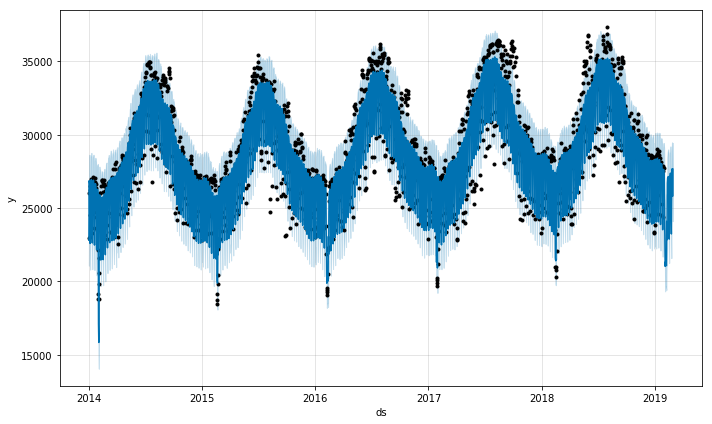

In [35]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

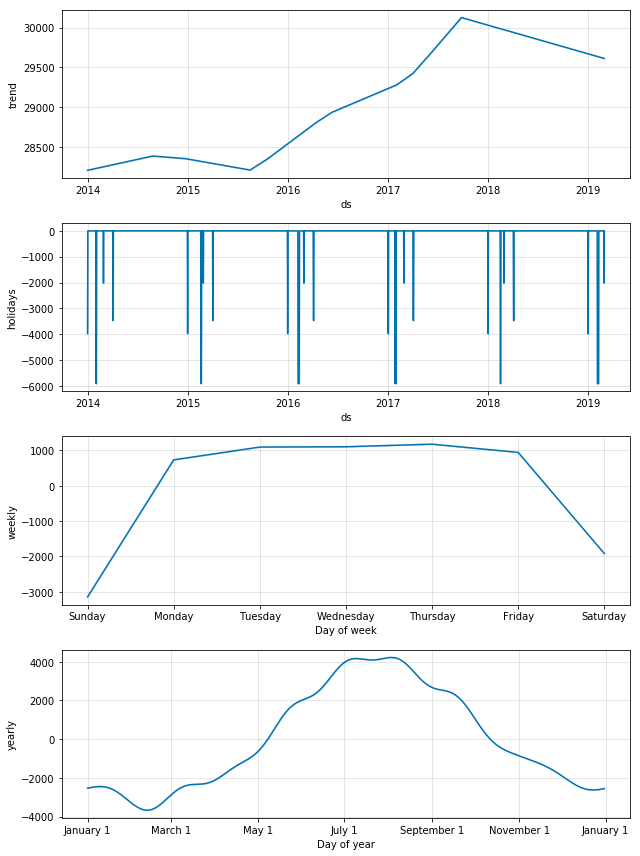

In [36]:
fig2 = m.plot_components(forecast)

In [37]:
# plt.figure(figsize=(20,4))
# x_axis = range(0, 80)
# plt.plot(x_axis, data_2019.head(80)['peak_load'], '-')
# plt.plot(x_axis, forecast['yhat'].tail(80), '-')
# plt.title('Truth vs forecast')
# plt.legend(['Truth', 'forecast'])
# plt.show()

In [38]:
# plt.figure(figsize=(20,4))
# x_axis = range(0, 365)
# plt.plot(x_axis, data_2018['peak_load'], '-')
# plt.plot(x_axis, forecast['yhat'].tail(365), '-')
# plt.title('Truth vs forecasted')
# plt.legend(['Truth', 'forecasted'])
# plt.show()

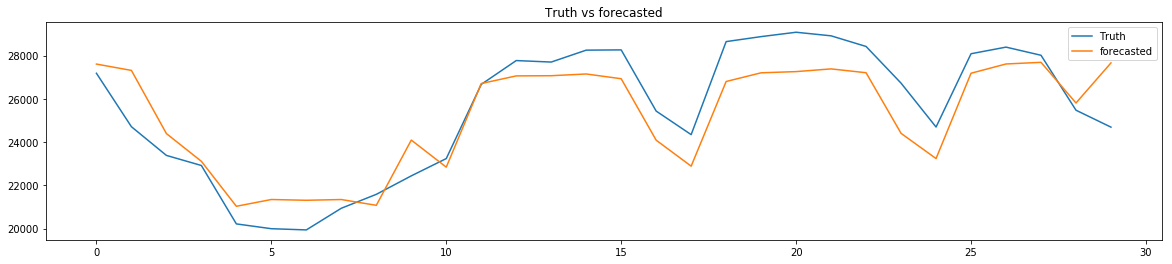

In [39]:
plt.figure(figsize=(20,4))
x_axis = range(0, 30)
plt.plot(x_axis, data_2019[30:60]['peak_load'], '-')
plt.plot(x_axis, forecast['yhat'].tail(30), '-')
plt.title('Truth vs forecasted')
plt.legend(['Truth', 'forecasted'])
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_predicted, y_actual):
    return sqrt(mean_squared_error(y_actual, y_predicted))
    

In [42]:
rmse(forecast['yhat'].tail(30), data_2019[30:60]['peak_load'])

1352.0432997531873

In [11]:
m.train_holiday_names

0    chinese_new_year
1            new_year
2       tomb_sweeping
3           228_peace
dtype: object